In [3]:
from lan_py_common.lib import *
from IPython.display import display, Math # type: ignore

df = Df.from_schema_and_csv(
    DfJsonSchema.from_dict({
        'ty': 'Iris',
        'Id': 'int',
        'SepalLengthCm': 'float',
        'SepalWidthCm': 'float',
        'PetalLengthCm': 'float',
        'PetalWidthCm': 'float',
        'Species': 'str',
    }).unwrap(),
    '~/data/kaggle/datasets/uciml/iris/Iris.csv'
).unwrap()

plot_df = to_labeled_scatter2_df(df, "PetalLengthCm", "SepalWidthCm", "Species").unwrap()
alt_colored_scatter2(plot_df, groupby_method="sum")

alt.Chart(...)

Polyfit: 5.45 + -5.63x^1 + 1510.38x^2 + -29628.84x^3 + 235260.43x^4 + -988548.12x^5 + 2432314.97x^6 + -3624846.22x^7 + 3221039.94x^8 + -1570375.85x^9 + 323278.73x^10
Std Dev: 0.28


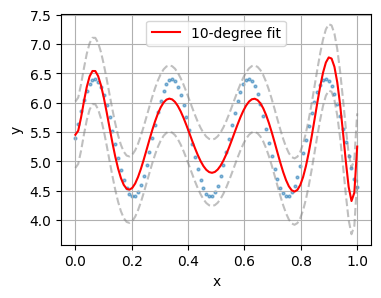

In [1]:

from lan_py_common.lib import *
from IPython.display import display, Math # type: ignore
import numpy as np

xs = np.linspace(0, 1, 100)
m = 2.3
b = 5.4

df = Df.from_schema_and_data(
    DfJsonSchema.from_dict({
        'ty': 'Func',
        'x': 'float',
        'y': 'float',
    }).unwrap(),
    {
        'x': xs,
        'y': (np.sin(m*10*xs) + b) 
    }
).unwrap()

plot_df = to_scatter2_df(df, 'x', 'y').unwrap()
mpl_scatter2(plot_df, groupby_method='mean', polyfit=10, polyfit_legend='Text')

In [3]:
import numpy as np
import ipywidgets as widgets
from IPython.display import display
from lan_py_common.lib import *

xs = np.linspace(0, 1, 100)

def plot_func(m: float, b: float, label: str, toggle: bool):
    df = Df.from_schema_and_data(
        DfJsonSchema.from_dict({
            'ty': 'Func',
            'x': 'float',
            'y': 'float',
        }).unwrap(),
        {
            'x': xs,
            'y': np.sin(m * 10 * xs) + b
        }
    ).unwrap()

    plot_df = to_scatter2_df(df, 'x', 'y').unwrap()
    if toggle:
        mpl_scatter2(plot_df, groupby_method='mean', polyfit=10, opt_title=label)

widg = {
    'm': widgets.FloatSlider(value=2.3, min=0.0, max=5.0, step=0.1, description='m', continuous_update=True),
    'b': widgets.FloatSlider(value=5.4, min=0.0, max=10.0, step=0.1, description='b', continuous_update=True),
    'label': widgets.Text(value='Text', description='Label'),
    'toggle': widgets.Checkbox(value=True, description='Show')
}

mpl_with_widgets(plot_func, widg)

Output()